# Метрическая классификация. Метод ближайших соседей и его развитие
# Практическая работа

## Цели практической работы
Научиться:
- строить модель методом ближайших соседей на реальных данных;
- правильно определять качество работы модели.


## Что входит в практическую работу


- Загрузить данные и ознакомиться с ними.
- Изучить данные и провести анализ.
- Разделить данные на обучающую и тестовую выборки.
- Реализовать построение модели с помощью  библиотеки Scikit-learn.
- Подобрать оптимальное число ближайших соседей методом leave-one-out.
- Получить качество модели с помощью F-меры и матрицы сопряжённости.

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите дамп базы в Postgres. 
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности. 


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

1. Изучите состав БД с помощью инструмента отрисовки ERD-диаграмм (Entity Relationship diagram отображает все сущности БД, а также визуализирует связность таблиц). Соберите датасет следующей структуры из данных, имеющихся в базе:

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

### Выгрузка данных произведена в файле 'get_df_from_postgres'

### Сбор финального датафрейма произведен в файле 'merge_df'

2. Постройте модель зависимости TARGET от остальных параметров получившейся таблицы методом ближайших соседей.

3. Получите качество модели с помощью F-меры и матрицы сопряжённости.

In [1]:
# подключить необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import FormatStrFormatter
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from sklearn.metrics import f1_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# считать данные

df = pd.read_csv('data/6.8 after_merge_df.csv')
df.head()

,agreement_rk,id_client,target,personal_income,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,loan_num_total,loan_num_closed
0,59910150.0,106804370.0,0.0,5000.0,49.0,1.0,2.0,1.0,2.0,1.0,1,1.0
1,59910230.0,106804371.0,0.0,12000.0,32.0,1.0,3.0,3.0,2.0,1.0,1,1.0
2,59910525.0,106804372.0,0.0,9000.0,52.0,1.0,4.0,0.0,2.0,1.0,2,1.0
3,59910803.0,106804373.0,0.0,25000.0,39.0,1.0,1.0,1.0,2.0,1.0,1,1.0
4,59911781.0,106804374.0,0.0,12000.0,30.0,0.0,0.0,0.0,2.0,1.0,2,1.0


## Ознакомление с данными

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   agreement_rk       15223 non-null  float64
 1   id_client          15223 non-null  float64
 2   target             15223 non-null  float64
 3   personal_income    15223 non-null  float64
 4   age                15223 non-null  float64
 5   gender             15223 non-null  float64
 6   child_total        15223 non-null  float64
 7   dependants         15223 non-null  float64
 8   socstatus_work_fl  15223 non-null  float64
 9   socstatus_pens_fl  15223 non-null  float64
 10  loan_num_total     15223 non-null  int64  
 11  loan_num_closed    15223 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.4 MB


In [4]:
df.describe()

,agreement_rk,id_client,target,personal_income,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,loan_num_total,loan_num_closed
count,1.522300e+04,1.522300e+04,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000
mean,6.540183e+07,1.068120e+08,0.119030,13853.836323,40.406096,0.654536,1.099389,0.645208,1.909610,1.134468,1.387769,0.751889
std,4.568181e+06,4.394646e+03,0.323835,9015.467617,11.601068,0.475535,0.995411,0.812252,0.286748,0.341165,0.793566,0.988499
min,5.991015e+07,1.068044e+08,0.000000,24.000000,21.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,6.192092e+07,1.068082e+08,0.000000,8000.000000,30.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000
50%,6.437100e+07,1.068120e+08,0.000000,12000.000000,39.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000
75%,6.708802e+07,1.068158e+08,0.000000,17000.000000,50.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000
max,7.529224e+07,1.068196e+08,1.000000,250000.000000,67.000000,1.000000,10.000000,7.000000,2.000000,2.000000,11.000000,11.000000


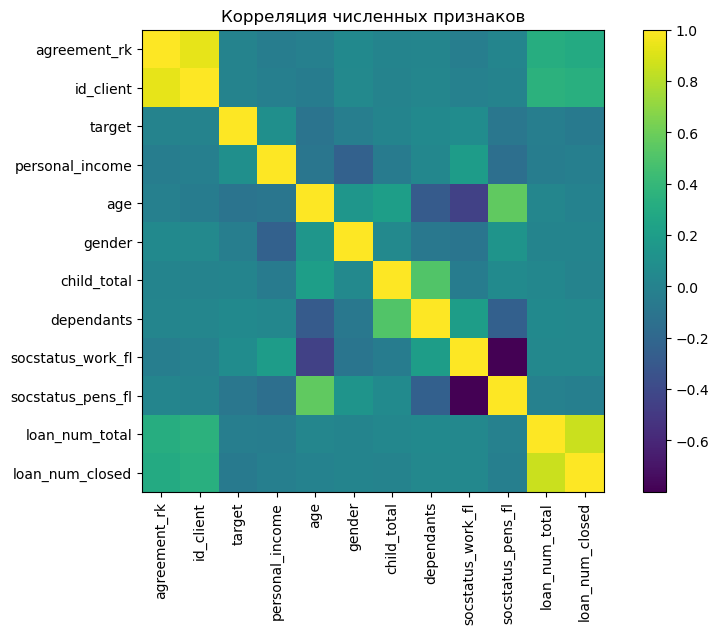

In [5]:
# Матрица корреляций.
# Целевая переменная ни с чем не коррелирует.
# Высокую корреляцию имеют id-признаки (перед моделированием их удалим) и признаки "общее количество ссуд", "количество закрытых ссуд".

plt.figure(figsize=(10, 6))

columns = df.corr().columns.tolist()
plt.imshow(df.corr())

plt.title("Корреляция численных признаков")
plt.xticks(range(0, len(columns)), columns, rotation=90)
plt.yticks(range(0, len(columns)), columns)
plt.colorbar()
plt.show()

In [6]:
# Вывод значений целевой переменной и их количества.
# Видим, что классы несбалансированы.
df.target.value_counts()

0.0    13411
1.0     1812
Name: target, dtype: int64

In [7]:
# Выведем процент отклика на маркетинговую компанию, который понадобиться в дальнейшем для анализа признаков и зависимостей.
print('Отклик на маркетинговую компанию: ', round(((len(df[df['target'] == 1]) / len(df)) * 100), 2), '%')

Отклик на маркетинговую компанию:  11.9 %


In [8]:
# Вывод количества уникальных значений признаков и их частот для более детального анализа.
for column in ['age','gender','child_total','dependants','socstatus_work_fl','socstatus_pens_fl','loan_num_total','loan_num_closed']:    
    column_name = df[column]
    print(f"Характеристика: {column} \nКоличество уникальных значений: {column_name.nunique()} \nСписок значений: \n{column_name.value_counts()} \n")

Характеристика: age 
Количество уникальных значений: 47 
Список значений: 
27.0    485
26.0    480
33.0    461
31.0    461
30.0    460
34.0    455
35.0    442
24.0    437
32.0    435
25.0    430
38.0    429
29.0    427
37.0    420
39.0    415
28.0    414
40.0    406
23.0    380
36.0    376
42.0    373
44.0    363
41.0    363
45.0    358
48.0    358
50.0    352
51.0    349
52.0    349
49.0    348
53.0    339
43.0    335
56.0    334
47.0    320
46.0    313
54.0    295
22.0    292
55.0    289
57.0    283
58.0    276
59.0    216
61.0    212
60.0    206
62.0    148
63.0    138
64.0    127
65.0     43
66.0     17
21.0     13
67.0      1
Name: age, dtype: int64 

Характеристика: gender 
Количество уникальных значений: 2 
Список значений: 
1.0    9964
0.0    5259
Name: gender, dtype: int64 

Характеристика: child_total 
Количество уникальных значений: 10 
Список значений: 
1.0     5087
0.0     4984
2.0     4140
3.0      799
4.0      133
5.0       59
6.0       12
7.0        5
10.0       3
8.0  

## Обработка аномалий

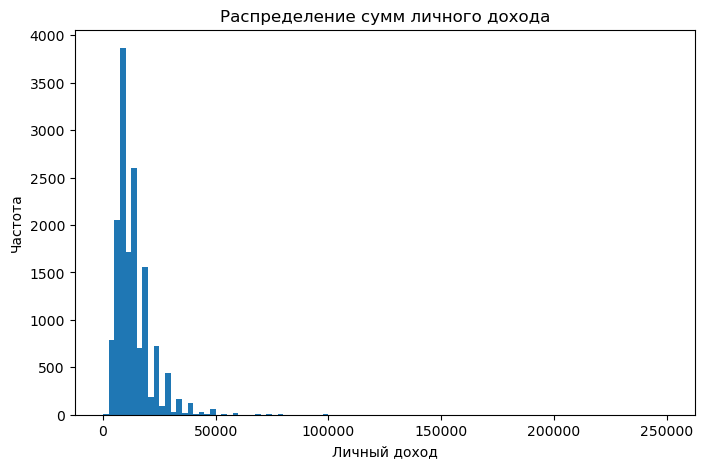

In [9]:
# Согласно графику, в признаке "personal_income" есть выбросы.
plt.figure(figsize=(8, 5))
plt.hist(df.personal_income, bins=100)
plt.xlabel('Личный доход')
plt.ylabel('Частота')
plt.title('Распределение сумм личного дохода');

In [10]:
# Функция "межквартильного интервала" для обнаружения выбросов.
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries

In [11]:
# Границы интревала.
boundaries = calculate_outliers(df['personal_income'])
boundaries

(-5500.0, 30500.0)

In [12]:
# Количество объектов, выходящих за верхнюю границу интервала.
is_outlier = (df['personal_income'] > boundaries[1])
is_outlier.sum()

483

In [13]:
# Присвоение таким объектам верхней границы интервала.
df.loc[is_outlier, 'personal_income'] = int(boundaries[1])

In [14]:
# Также видим одно маленькое аномальное значение, которое не выбилось за границы интервала, но которое нужно обработать.
df.personal_income.sort_values().head()

3491      24.0
9091    1950.0
9842    2000.0
4081    2000.0
5222    2100.0
Name: personal_income, dtype: float64

In [15]:
# Объект имеет статус "работает", но значение дохода явно ошибочное.
df[(df['personal_income'] == 24)]

,agreement_rk,id_client,target,personal_income,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,loan_num_total,loan_num_closed
3491,61534026.0,106807861.0,0.0,24.0,28.0,0.0,1.0,1.0,2.0,1.0,1,0.0


In [16]:
# Заменим значение "24" на среднее по колонке "personal_income".
df.loc[(df['personal_income'] == 24),'personal_income'] = df.personal_income.mean()

In [17]:
# Убедимся, что преобразования сработали.
df['personal_income'].describe()

count    15223.000000
mean     13409.255385
std       6693.784633
min       1950.000000
25%       8000.000000
50%      12000.000000
75%      17000.000000
max      30500.000000
Name: personal_income, dtype: float64

In [18]:
# Редко встречающиеся значения некоторых количественных признаков объединим в одно значение.
# Это преобразование поможет избежать шума и выбросов, к которым метод "ближайших соседей" очень чувствителен.

# В признаке "количество детей" значения 6,7,8,10 (таких значений в датасете мало) заменим на 5.
df['child_total'] = df['child_total'].replace([6,7,8,9,10],[5,5,5,5,5])

# В признаке "количество иждивенцев" значения 5,6,7 заменим на 4.
df['dependants'] = df['dependants'].replace([5,6,7],[4,4,4])

# В признаке "количество ссуд" значения 6,7,8,11 заменим на 5.
df['loan_num_total'] = df['loan_num_total'].replace([6,7,8,11],[5,5,5,5])

# В признаке "количество погашенных ссуд" значения 6,7,8,11 заменим на 5.
df['loan_num_closed'] = df['loan_num_closed'].replace([6,7,8,11],[5,5,5,5])

#### Преобразование типов признаков

In [19]:
# Принимаем решение некоторые изначально числовые признаки преобразовать в категориальные.

# В признаке "рабочий статус" значения 1 и 2 заменим соответственно на 'No' (не работает) и 'Yes' (работает).
df['socstatus_work_fl'] = df['socstatus_work_fl'].replace([1,2],['No','Yes'])

# В признаке "пенсионный статус" значения 1 и 2 заменим соответственно на 'No' (не на пенсии) и 'Yes' (на пенсии).
df['socstatus_pens_fl'] = df['socstatus_pens_fl'].replace([1,2],['No','Yes'])

# В признаке "пол" значения 1 и 0 заменим соответственно на 'Men' и 'Women'.
df['gender'] = df['gender'].replace([1,0],['Men','Women'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   agreement_rk       15223 non-null  float64
 1   id_client          15223 non-null  float64
 2   target             15223 non-null  float64
 3   personal_income    15223 non-null  float64
 4   age                15223 non-null  float64
 5   gender             15223 non-null  object 
 6   child_total        15223 non-null  float64
 7   dependants         15223 non-null  float64
 8   socstatus_work_fl  15223 non-null  object 
 9   socstatus_pens_fl  15223 non-null  object 
 10  loan_num_total     15223 non-null  int64  
 11  loan_num_closed    15223 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 1.4+ MB


## Анализ зависимости целевой переменной от признаков

#### Зависимость от личного дохода

In [21]:
# Создание вспомогательного признака, разделением дохода клиентов на интервалы.
# В качестве границ интервалов возьмем 25,50 и 75 квантили.
df['income_interval'] =  df.apply(lambda x: "17-30" if x.personal_income > 17000 
                                  else ("12-17" if 12000 < x.personal_income <= 17000 
                                        else ("8-12" if 8000 < x.personal_income <= 12000 else "2-8" )), axis=1)
df['income_interval']

0          2-8
1         8-12
2         8-12
3        17-30
4         8-12
         ...  
15218     8-12
15219     8-12
15220      2-8
15221      2-8
15222    17-30
Name: income_interval, Length: 15223, dtype: object

In [22]:
# Датафрейм с количеством компаний, сгруппированных по 'income_interval'.
stats = df.groupby(['income_interval'], as_index=False)[['target']].count()
stats = stats.rename(columns={'target':'target_all'})
stats

,income_interval,target_all
0,12-17,3345
1,17-30,3507
2,2-8,3952
3,8-12,4419


In [23]:
# Создание колонки с количеством компаний, получивших отклик, в зависимости от 'income_interval'.
stats['target=1'] = stats.income_interval.apply(lambda x: len(df[(df['income_interval'] == x) & (df['target'] == 1)]))
stats['target%'] = round(((stats['target=1'] / stats['target_all'])*100), 1)
stats = stats.sort_values(by='target%')
stats

,income_interval,target_all,target=1,target%
2,2-8,3952,323,8.2
3,8-12,4419,473,10.7
0,12-17,3345,439,13.1
1,17-30,3507,577,16.5


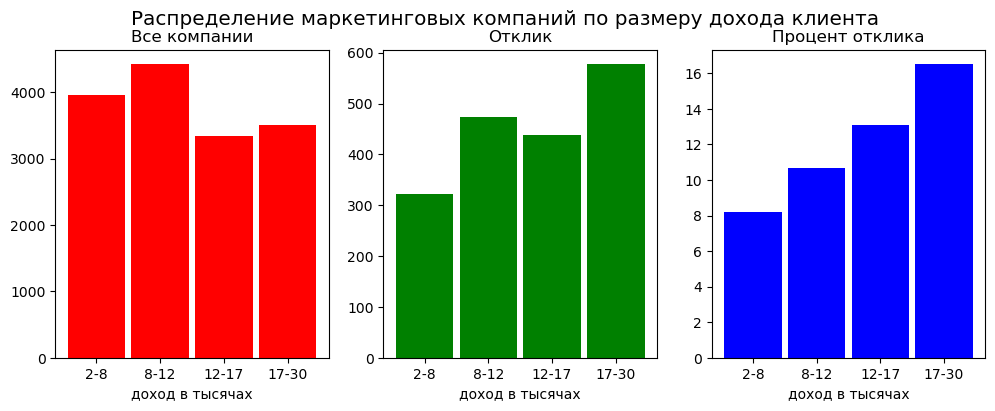

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True)

ax1.bar(stats['income_interval'], stats['target_all'], width=0.9, color='red')
ax1.set_title('Все компании')
ax1.set_xlabel('доход в тысячах')

ax2.bar(stats['income_interval'], stats['target=1'], width=0.9, color='green')
ax2.set_title('Отклик')
ax2.set_xlabel('доход в тысячах')

ax3.bar(stats['income_interval'], stats['target%'], width=0.9, color='blue')
ax3.set_title('Процент отклика')
ax3.set_xlabel('доход в тысячах')

fig.suptitle('Распределение маркетинговых компаний по размеру дохода клиента', fontsize='x-large');

#### Зависимость от пола клиента

In [25]:
# Датафрейм с количеством маркетинговых компаний, сгруппированных по полу клиента.
stats = df.groupby(['gender'], as_index=False)[['target']].count()
stats = stats.rename(columns={'target':'target_all'})
stats

,gender,target_all
0,Men,9964
1,Women,5259


In [26]:
# Создание колонки с количеством маркетинговых компаний, получивших отклик.
stats['target=1'] = stats.gender.apply(lambda x: len(df[(df['gender'] == x) & (df['target'] == 1)]))

In [27]:
# Создание колонки с процентом конверсии.
stats['target%'] = round(((stats['target=1'] / stats['target_all'])*100), 1)
stats

,gender,target_all,target=1,target%
0,Men,9964,1114,11.2
1,Women,5259,698,13.3


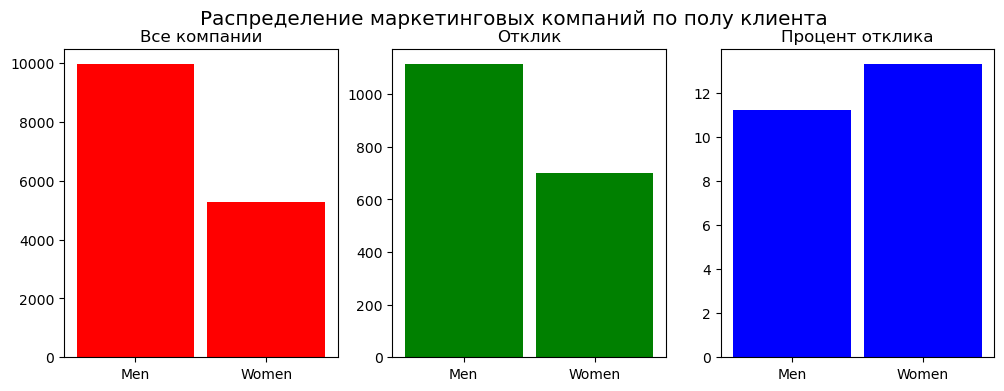

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True)

ax1.bar(stats['gender'], stats['target_all'], width=0.9, color='red')
ax1.set_title('Все компании')

ax2.bar(stats['gender'], stats['target=1'], width=0.9, color='green')
ax2.set_title('Отклик')

ax3.bar(stats['gender'], stats['target%'], width=0.9, color='blue')
ax3.set_title('Процент отклика')

fig.suptitle('Распределение маркетинговых компаний по полу клиента', fontsize='x-large');

#### Зависимость от количества детей

In [29]:
# Датафрейм с количеством компаний, сгруппированных по количеству детей.
stats = df.groupby(['child_total'], as_index=False)[['target']].count()
stats = stats.rename(columns={'target':'target_all'})
stats

,child_total,target_all
0,0.0,4984
1,1.0,5087
2,2.0,4140
3,3.0,799
4,4.0,133
5,5.0,80


In [30]:
# Создание колонки с количеством компаний, получивших отклик, в зависимости от количества детей.
stats['target=1'] = stats.child_total.apply(lambda x: len(df[(df['child_total'] == x) & (df['target'] == 1)]))
stats['target%'] = round(((stats['target=1'] / stats['target_all'])*100), 1)
stats

,child_total,target_all,target=1,target%
0,0.0,4984,590,11.8
1,1.0,5087,593,11.7
2,2.0,4140,484,11.7
3,3.0,799,111,13.9
4,4.0,133,21,15.8
5,5.0,80,13,16.2


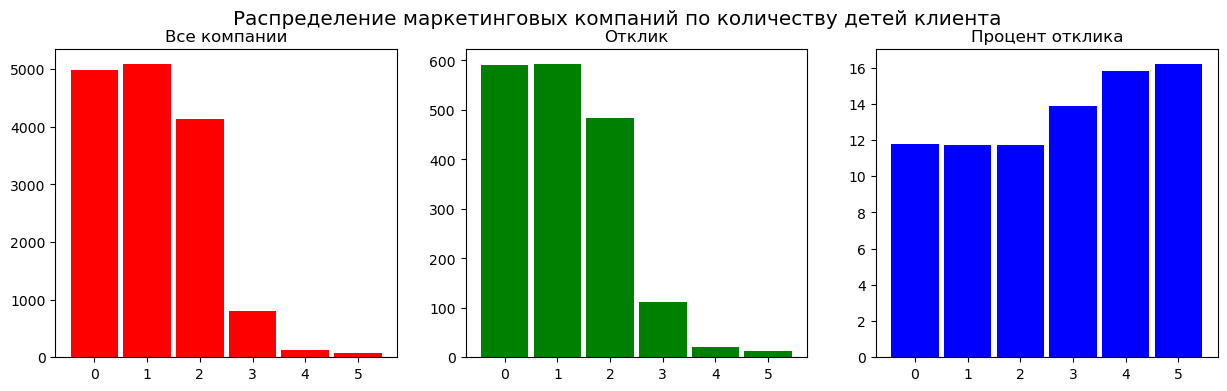

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

ax1.bar(stats['child_total'], stats['target_all'], width=0.9, color='red')
ax1.set_title('Все компании')

ax2.bar(stats['child_total'], stats['target=1'], width=0.9, color='green')
ax2.set_title('Отклик')

ax3.bar(stats['child_total'], stats['target%'], width=0.9, color='blue')
ax3.set_title('Процент отклика')

fig.suptitle('Распределение маркетинговых компаний по количеству детей клиента', fontsize='x-large');

#### Зависимость от количества иждивенцев

In [32]:
# Датафрейм с количеством компаний, сгруппированных по количеству иждивенцев.
stats = df.groupby(['dependants'], as_index=False)[['target']].count()
stats = stats.rename(columns={'target':'target_all'})
stats

,dependants,target_all
0,0.0,8226
1,1.0,4535
2,2.0,2167
3,3.0,243
4,4.0,52


In [33]:
# Создание колонки с количеством компаний, получивших отклик, в зависимости от количества иждивенцев.
stats['target=1'] = stats.dependants.apply(lambda x: len(df[(df['dependants'] == x) & (df['target'] == 1)]))
stats['target%'] = round(((stats['target=1'] / stats['target_all'])*100), 1)
stats

,dependants,target_all,target=1,target%
0,0.0,8226,880,10.7
1,1.0,4535,566,12.5
2,2.0,2167,304,14.0
3,3.0,243,49,20.2
4,4.0,52,13,25.0


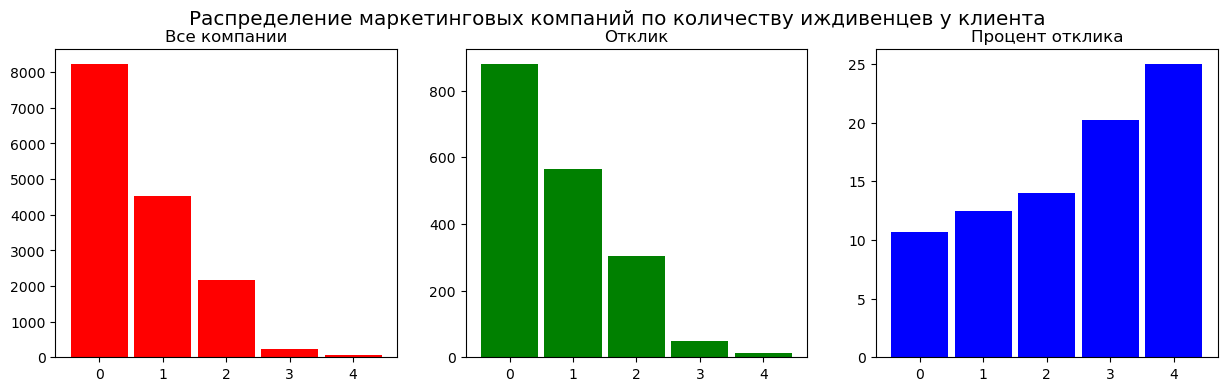

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

ax1.bar(stats['dependants'], stats['target_all'], width=0.9, color='red')
ax1.set_title('Все компании')

ax2.bar(stats['dependants'], stats['target=1'], width=0.9, color='green')
ax2.set_title('Отклик')

ax3.bar(stats['dependants'], stats['target%'], width=0.9, color='blue')
ax3.set_title('Процент отклика')

fig.suptitle('Распределение маркетинговых компаний по количеству иждивенцев у клиента', fontsize='x-large');

#### Зависимость от рабочего статуса 

In [35]:
# Датафрейм с количеством компаний, сгруппированных по рабочему статусу.
stats = df.groupby(['socstatus_work_fl'], as_index=False)[['target']].count()
stats = stats.rename(columns={'target':'target_all'})
stats

,socstatus_work_fl,target_all
0,No,1376
1,Yes,13847


In [36]:
# Создание колонки с количеством компаний, получивших отклик, сгруппированных по рабочему статусу.
stats['target=1'] = stats.socstatus_work_fl.apply(lambda x: len(df[(df['socstatus_work_fl'] == x) & (df['target'] == 1)]))
stats['target%'] = round(((stats['target=1'] / stats['target_all'])*100), 1)
stats

,socstatus_work_fl,target_all,target=1,target%
0,No,1376,53,3.9
1,Yes,13847,1759,12.7


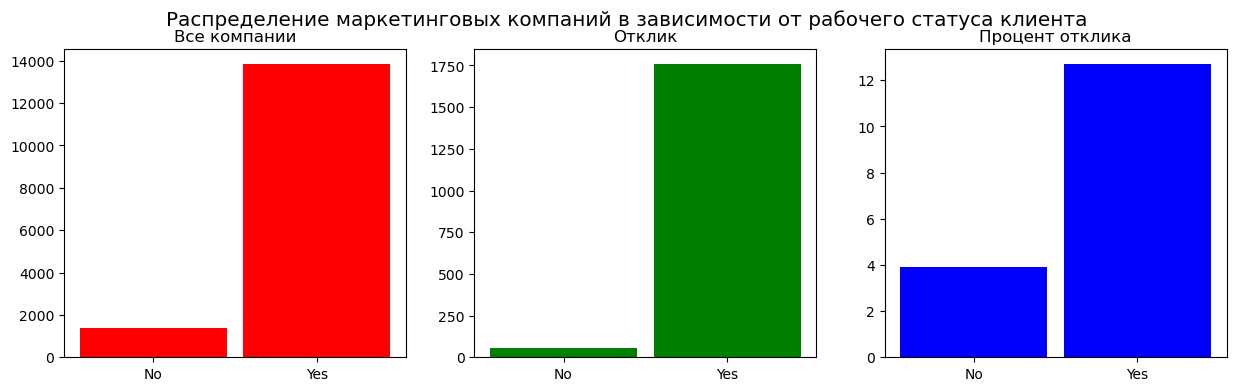

In [37]:
# Видим, что количество всех сессий росло, но процент конверсии падал с течением времени.
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

ax1.bar(stats['socstatus_work_fl'], stats['target_all'], width=0.9, color='red')
ax1.set_title('Все компании')

ax2.bar(stats['socstatus_work_fl'], stats['target=1'], width=0.9, color='green')
ax2.set_title('Отклик')

ax3.bar(stats['socstatus_work_fl'], stats['target%'], width=0.9, color='blue')
ax3.set_title('Процент отклика')

fig.suptitle('Распределение маркетинговых компаний в зависимости от рабочего статуса клиента', fontsize='x-large');

#### Зависимость от пенсионного статуса

In [38]:
# Датафрейм с количеством компаний, сгруппированных по пенсионному статусу.
stats = df.groupby(['socstatus_pens_fl'], as_index=False)[['target']].count()
stats = stats.rename(columns={'target':'target_all'})
stats

,socstatus_pens_fl,target_all
0,No,13176
1,Yes,2047


In [39]:
# Создание колонки с количеством компаний, получивших отклик, сгруппированных по пенсионному статусу.
stats['target=1'] = stats.socstatus_pens_fl.apply(lambda x: len(df[(df['socstatus_pens_fl'] == x) & (df['target'] == 1)]))
stats['target%'] = round(((stats['target=1'] / stats['target_all'])*100), 1)
stats

,socstatus_pens_fl,target_all,target=1,target%
0,No,13176,1711,13.0
1,Yes,2047,101,4.9


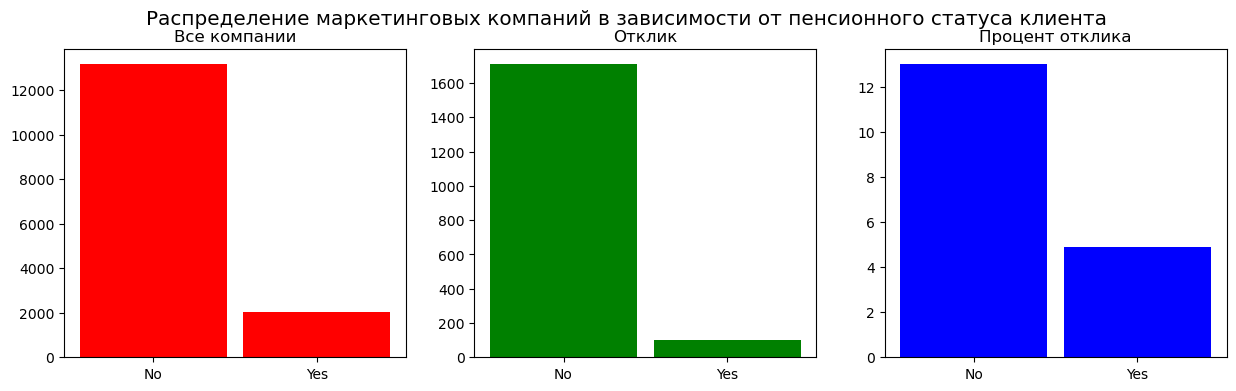

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

ax1.bar(stats['socstatus_pens_fl'], stats['target_all'], width=0.9, color='red')
ax1.set_title('Все компании')

ax2.bar(stats['socstatus_pens_fl'], stats['target=1'], width=0.9, color='green')
ax2.set_title('Отклик')

ax3.bar(stats['socstatus_pens_fl'], stats['target%'], width=0.9, color='blue')
ax3.set_title('Процент отклика')

fig.suptitle('Распределение маркетинговых компаний в зависимости от пенсионного статуса клиента', fontsize='x-large');

#### Зависимость от количества ссуд в кредитной истории клиента

In [41]:
# Датафрейм с количеством компаний, сгруппированных по количеству ссуд в кредитной истории.
stats = df.groupby(['loan_num_total'], as_index=False)[['target']].count()
stats = stats.rename(columns={'target':'target_all'})
stats

,loan_num_total,target_all
0,1,11288
1,2,2633
2,3,871
3,4,275
4,5,156


In [42]:
# Создание колонки с количеством компаний, получивших отклик, сгруппированных по количеству ссуд в кредитной истории.
stats['target=1'] = stats.loan_num_total.apply(lambda x: len(df[(df['loan_num_total'] == x) & (df['target'] == 1)]))
stats['target%'] = round(((stats['target=1'] / stats['target_all'])*100), 1)
stats

,loan_num_total,target_all,target=1,target%
0,1,11288,1425,12.6
1,2,2633,262,10.0
2,3,871,87,10.0
3,4,275,24,8.7
4,5,156,14,9.0


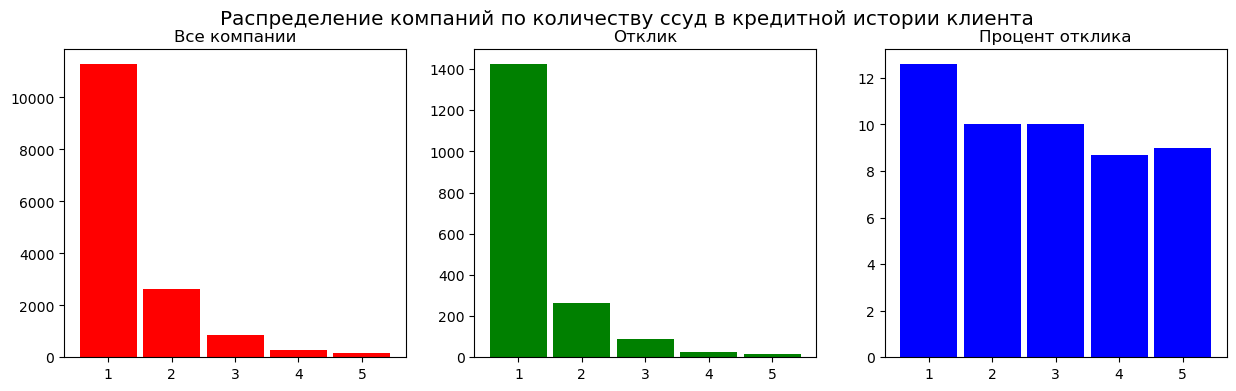

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

ax1.bar(stats['loan_num_total'], stats['target_all'], width=0.9, color='red')
ax1.set_title('Все компании')

ax2.bar(stats['loan_num_total'], stats['target=1'], width=0.9, color='green')
ax2.set_title('Отклик')

ax3.bar(stats['loan_num_total'], stats['target%'], width=0.9, color='blue')
ax3.set_title('Процент отклика')

fig.suptitle('Распределение компаний по количеству ссуд в кредитной истории клиента', fontsize='x-large');

#### Зависимость от количества погашенных ссуд в кредитной истории клиента

In [44]:
# Датафрейм с количеством компаний, сгруппированных по количеству погпшенных ссуд в кредитной истории.
stats = df.groupby(['loan_num_closed'], as_index=False)[['target']].count()
stats = stats.rename(columns={'target':'target_all'})
stats

,loan_num_closed,target_all
0,0.0,7791
1,1.0,4761
2,2.0,1770
3,3.0,603
4,4.0,202
5,5.0,96


In [45]:
# Создание колонки с количеством компаний, получивших отклик, сгруппированных по количеству погашенных ссуд в кредитной истории.
stats['target=1'] = stats.loan_num_closed.apply(lambda x: len(df[(df['loan_num_closed'] == x) & (df['target'] == 1)]))
stats['target%'] = round(((stats['target=1'] / stats['target_all'])*100), 1)
stats

,loan_num_closed,target_all,target=1,target%
0,0.0,7791,1094,14.0
1,1.0,4761,489,10.3
2,2.0,1770,156,8.8
3,3.0,603,48,8.0
4,4.0,202,18,8.9
5,5.0,96,7,7.3


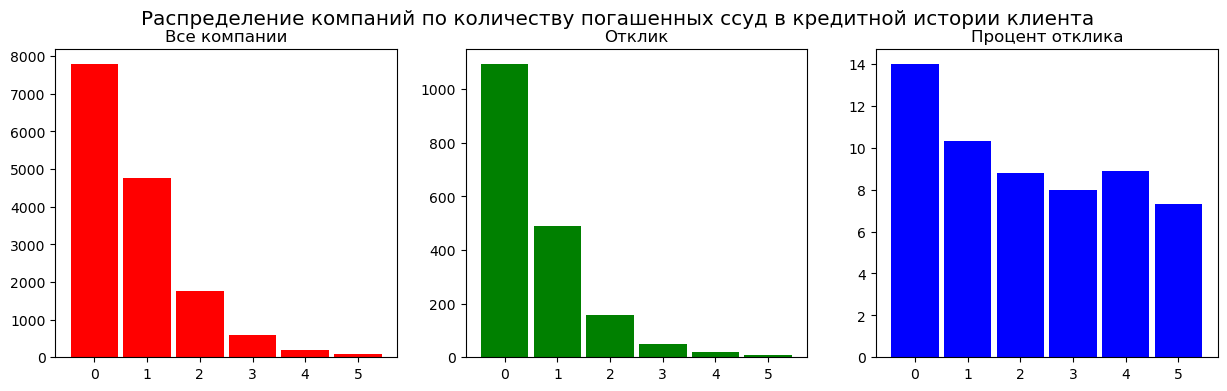

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

ax1.bar(stats['loan_num_closed'], stats['target_all'], width=0.9, color='red')
ax1.set_title('Все компании')

ax2.bar(stats['loan_num_closed'], stats['target=1'], width=0.9, color='green')
ax2.set_title('Отклик')

ax3.bar(stats['loan_num_closed'], stats['target%'], width=0.9, color='blue')
ax3.set_title('Процент отклика')

fig.suptitle('Распределение компаний по количеству погашенных ссуд в кредитной истории клиента', fontsize='x-large');

#### Зависимость от возраста клиента

In [47]:
# Датафрейм с количеством визитов, сгруппированных по возрасту клиента.
stats = df.groupby(['age'], as_index=False)[['target']].count()
stats = stats.rename(columns={'target':'target_all'})
stats.head()

,age,target_all
0,21.0,13
1,22.0,292
2,23.0,380
3,24.0,437
4,25.0,430


In [48]:
# Создание колонки с количеством компаний, получивших отклик, сгруппированных по возрасту клиента.
stats['target=1'] = stats.age.apply(lambda x: len(df[(df['age'] == x) & (df['target'] == 1)]))
stats['target%'] = round(((stats['target=1'] / stats['target_all'])*100), 1)
stats.head()

,age,target_all,target=1,target%
0,21.0,13,2,15.4
1,22.0,292,49,16.8
2,23.0,380,58,15.3
3,24.0,437,69,15.8
4,25.0,430,74,17.2


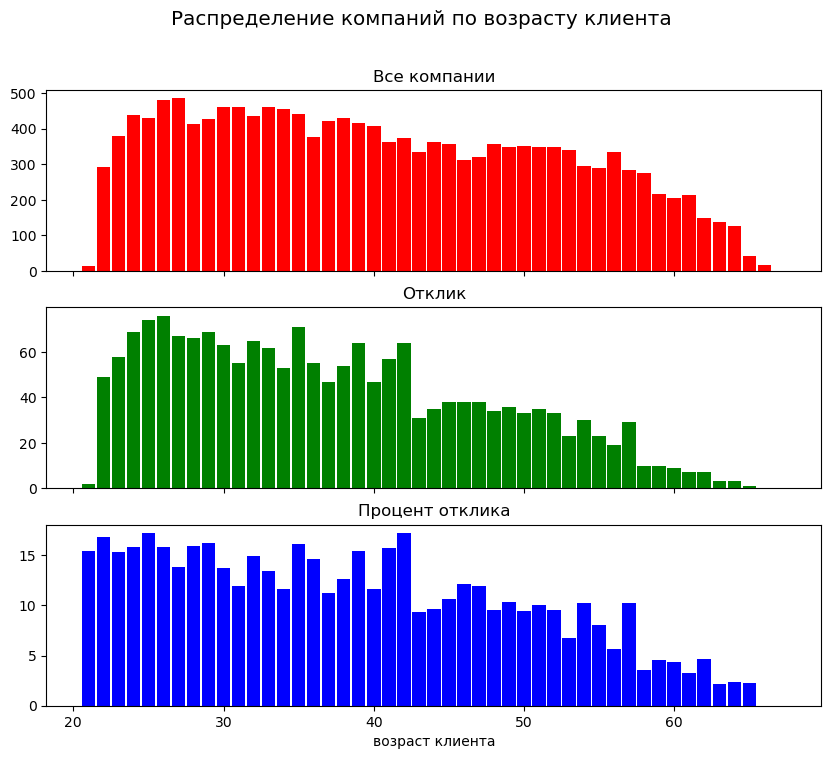

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 8), sharex=True)

ax1.bar(stats['age'], stats['target_all'], width=0.9, color='red')
ax1.set_title('Все компании')

ax2.bar(stats['age'], stats['target=1'], width=0.9, color='green')
ax2.set_title('Отклик')

ax3.bar(stats['age'], stats['target%'], width=0.9, color='blue')
ax3.set_xlabel('возраст клиента')
ax3.set_title('Процент отклика')

fig.suptitle('Распределение компаний по возрасту клиента', fontsize='x-large');

## Генерация признаков

In [50]:
# Создание вспомогательного столбца со средним значением суммы столбцов "количество детей" и "количество иждивенцев".
df['child_dependants_mean'] = (df['child_total'] + df['dependants'])/2
df.child_dependants_mean.describe()

count    15223.000000
mean         0.870459
std          0.778840
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.500000
Name: child_dependants_mean, dtype: float64

In [51]:
# Новому признаку присваиваем следующее значение: personal_income / child_dependants_mean.
# Если child_dependants_mean < 1, то personal_income * 1.25.
df['personal_income_upd'] = df.apply(lambda x: x.personal_income*1.25 if x.child_dependants_mean < 1 
                                     else x.personal_income/x.child_dependants_mean, axis=1)
df['personal_income_upd']

0         3333.333333
1         4000.000000
2         4500.000000
3        25000.000000
4        15000.000000
             ...     
15218    12000.000000
15219    10000.000000
15220     6000.000000
15221     4500.000000
15222    20000.000000
Name: personal_income_upd, Length: 15223, dtype: float64

In [52]:
df.personal_income_upd.describe()

count    15223.000000
mean     13290.755275
std       7891.321455
min       1000.000000
25%       7500.000000
50%      11550.000000
75%      17500.000000
max      38125.000000
Name: personal_income_upd, dtype: float64

## Преобразование категориальных признаков и стандартизация

#### Dummy-кодирование

In [53]:
df.columns

Index(['agreement_rk', 'id_client', 'target', 'personal_income', 'age',
       'gender', 'child_total', 'dependants', 'socstatus_work_fl',
       'socstatus_pens_fl', 'loan_num_total', 'loan_num_closed',
       'income_interval', 'child_dependants_mean', 'personal_income_upd'],
      dtype='object')

In [54]:
df = pd.get_dummies(df, columns=['gender', 'socstatus_work_fl', 'socstatus_pens_fl'])
df.head()

,agreement_rk,id_client,target,personal_income,age,child_total,dependants,loan_num_total,loan_num_closed,income_interval,child_dependants_mean,personal_income_upd,gender_Men,gender_Women,socstatus_work_fl_No,socstatus_work_fl_Yes,socstatus_pens_fl_No,socstatus_pens_fl_Yes
0,59910150.0,106804370.0,0.0,5000.0,49.0,2.0,1.0,1,1.0,2-8,1.5,3333.333333,1,0,0,1,1,0
1,59910230.0,106804371.0,0.0,12000.0,32.0,3.0,3.0,1,1.0,8-12,3.0,4000.000000,1,0,0,1,1,0
2,59910525.0,106804372.0,0.0,9000.0,52.0,4.0,0.0,2,1.0,8-12,2.0,4500.000000,1,0,0,1,1,0
3,59910803.0,106804373.0,0.0,25000.0,39.0,1.0,1.0,1,1.0,17-30,1.0,25000.000000,1,0,0,1,1,0
4,59911781.0,106804374.0,0.0,12000.0,30.0,0.0,0.0,2,1.0,8-12,0.0,15000.000000,0,1,0,1,1,0


#### Стандартизация количественных признаков

In [55]:
# Создаем датафрейм, содержащий только выбранные количественные признаки.
data = df[['personal_income', 'personal_income_upd', 'age', 'child_total', 'dependants', 'loan_num_total', 'loan_num_closed']]
data

,personal_income,personal_income_upd,age,child_total,dependants,loan_num_total,loan_num_closed
0,5000.0,3333.333333,49.0,2.0,1.0,1,1.0
1,12000.0,4000.000000,32.0,3.0,3.0,1,1.0
2,9000.0,4500.000000,52.0,4.0,0.0,2,1.0
3,25000.0,25000.000000,39.0,1.0,1.0,1,1.0
4,12000.0,15000.000000,30.0,0.0,0.0,2,1.0
...,...,...,...,...,...,...,...
15218,12000.0,12000.000000,25.0,1.0,1.0,3,2.0
15219,10000.0,10000.000000,51.0,2.0,0.0,1,0.0
15220,6000.0,6000.000000,22.0,1.0,1.0,1,0.0
15221,4500.0,4500.000000,60.0,2.0,0.0,1,0.0


In [56]:
# Создаем объект класса StandardScaler и идентифицируем параметры преобразования на датафрейме с количественными переменными.
std_scaler = StandardScaler()
std_scaler.fit(data)

StandardScaler()

In [57]:
# Применяем преобразование и сохраняем в новую переменную.
std_scaled = std_scaler.transform(data)

In [58]:
# Создаем наименования новых признаков по шаблону: year_std для year и так далее.
col = ['personal_income', 'personal_income_upd', 'age', 'child_total', 'dependants', 'loan_num_total', 'loan_num_closed']
col_new = []

for i in col:
    col_new.append(i + '_std') 
    
col_new

['personal_income_std',
 'personal_income_upd_std',
 'age_std',
 'child_total_std',
 'dependants_std',
 'loan_num_total_std',
 'loan_num_closed_std']

In [59]:
# Добавляем в исходный датафрейм получившиеся новые признаки.
df[col_new] = std_scaled
df.head()

,agreement_rk,id_client,target,personal_income,age,child_total,dependants,loan_num_total,loan_num_closed,income_interval,...,socstatus_work_fl_Yes,socstatus_pens_fl_No,socstatus_pens_fl_Yes,personal_income_std,personal_income_upd_std,age_std,child_total_std,dependants_std,loan_num_total_std,loan_num_closed_std
0,59910150.0,106804370.0,0.0,5000.0,49.0,2.0,1.0,1,1.0,2-8,...,1,1,0,-1.256319,-1.261861,0.740810,0.920593,0.441136,-0.501485,0.258651
1,59910230.0,106804371.0,0.0,12000.0,32.0,3.0,3.0,1,1.0,8-12,...,1,1,0,-0.210539,-1.177377,-0.724621,1.939806,2.920522,-0.501485,0.258651
2,59910525.0,106804372.0,0.0,9000.0,52.0,4.0,0.0,2,1.0,8-12,...,1,1,0,-0.658731,-1.114014,0.999415,2.959019,-0.798557,0.809316,0.258651
3,59910803.0,106804373.0,0.0,25000.0,39.0,1.0,1.0,1,1.0,17-30,...,1,1,0,1.731625,1.483862,-0.121208,-0.098621,0.441136,-0.501485,0.258651
4,59911781.0,106804374.0,0.0,12000.0,30.0,0.0,0.0,2,1.0,8-12,...,1,1,0,-0.210539,0.216605,-0.897024,-1.117834,-0.798557,0.809316,0.258651


In [60]:
# Удалим колонки, которые были исходными для формирования признаков, и новые признаки, которые были добавлены с целью обучения.
# Использовать "айдишники" при обучении не будем - удадяей и их.

columns_for_drop = ['agreement_rk', 'id_client', 'personal_income', 'personal_income_upd', 'age', 'child_total', 'dependants',
                    'loan_num_total', 'loan_num_closed', 'income_interval', 'child_dependants_mean']
                    
df = df.drop(columns=columns_for_drop)   

In [61]:
# Распечатаем оставшийся список колонок и размерность финального датафрейма.
print(df.columns)
print(df.shape)

Index(['target', 'gender_Men', 'gender_Women', 'socstatus_work_fl_No',
       'socstatus_work_fl_Yes', 'socstatus_pens_fl_No',
       'socstatus_pens_fl_Yes', 'personal_income_std',
       'personal_income_upd_std', 'age_std', 'child_total_std',
       'dependants_std', 'loan_num_total_std', 'loan_num_closed_std'],
      dtype='object')
(15223, 14)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   15223 non-null  float64
 1   gender_Men               15223 non-null  uint8  
 2   gender_Women             15223 non-null  uint8  
 3   socstatus_work_fl_No     15223 non-null  uint8  
 4   socstatus_work_fl_Yes    15223 non-null  uint8  
 5   socstatus_pens_fl_No     15223 non-null  uint8  
 6   socstatus_pens_fl_Yes    15223 non-null  uint8  
 7   personal_income_std      15223 non-null  float64
 8   personal_income_upd_std  15223 non-null  float64
 9   age_std                  15223 non-null  float64
 10  child_total_std          15223 non-null  float64
 11  dependants_std           15223 non-null  float64
 12  loan_num_total_std       15223 non-null  float64
 13  loan_num_closed_std      15223 non-null  float64
dtypes: float64(8), uint8(6

## Моделирование

In [63]:
# Разделение на обучающую и тестовую выборки

x = df.drop(['target'], axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=73)

In [64]:
# Создание объекта LeaveOneOut.
loo = LeaveOneOut()

In [65]:
%%time
# При кросс-валидации по train-выборке, этот объект LeaveOneOut будет тестовым для оценки качества,
# когда как остальные (их будет n-1 от количества объектов в train-выборке) будут использованы в качестве тренировочных.
# В качестве конечной метрики будет использована средняя метрика полученная на n-объектах LeaveOneOut при кросс-валидации.
# Тестировались алгоритмы ‘ball_tree’, ‘kd_tree’, ‘brute’ и взвешивания ‘uniform’, ‘distance’.
# Чуть-чуть лучшие показатели достигнуты при algorithm='ball_tree', weights='distance'.

score_list = []
for k in range(3, 16, 2):
    model_knn = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree', weights='distance', n_jobs=-1)
    scores = cross_val_score(model_knn, x_train, y_train, scoring='f1', cv=loo, n_jobs=-1)
    score_list.append([k, scores.mean()])

CPU times: total: 1min 20s
Wall time: 6min 8s


In [66]:
# Датафрейм с числом k-соседей и соответствующим показателем метрики f1.
score_df = pd.DataFrame(score_list, columns=['k', 'f1_score'])
score_df
# Лучшее значение f1-меры достигнуто при k-соседей равным 3.

,k,f1_score
0,3,0.010698
1,5,0.007695
2,7,0.006006
3,9,0.005537
4,11,0.005349
5,13,0.005255
6,15,0.005068


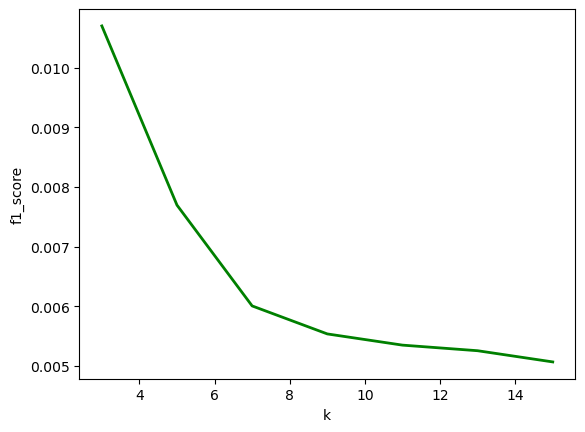

In [67]:
# График зависимости метрики f1 от числа k-соседей.
plt.plot(score_df['k'], score_df['f1_score'], linewidth=2, color='g')
plt.xlabel('k')
plt.ylabel('f1_score')
plt.show()

In [68]:
# Обучение модели с лучшими параметрами.
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1, algorithm='ball_tree', weights='distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=3,
                     weights='distance')

In [69]:
# Предсказание целевой переменной и вывод метрики f1 для тестовой выборки.
predicted_test = knn.predict(x_test)
print(f1_score(y_test, predicted_test))

0.09467455621301775


In [70]:
# Матрица сопряженности и матрица ошибок.
print(classification_report(y_test, predicted_test))
print(confusion_matrix(y_test, predicted_test))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      4037
         1.0       0.13      0.08      0.09       530

    accuracy                           0.83      4567
   macro avg       0.51      0.50      0.50      4567
weighted avg       0.80      0.83      0.81      4567

[[3762  275]
 [ 490   40]]


## Вывод

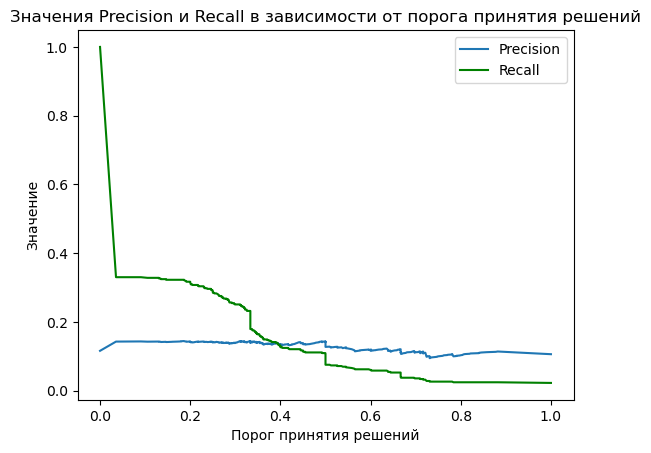

In [71]:
# Построения графика для анализа зависимости точности, отзыва и порога принятия решений.
precision, recall, threshold = precision_recall_curve(y_test, knn.predict_proba(x_test)[:, 1])

plt.plot(threshold, precision[:-1], label='Precision')
plt.plot(threshold, recall[:-1], 'g-', label='Recall')
plt.ylabel('Значение')
plt.xlabel('Порог принятия решений')
plt.title('Значения Precision и Recall в зависимости от порога принятия решений')
plt.legend(loc='best')
plt.show()

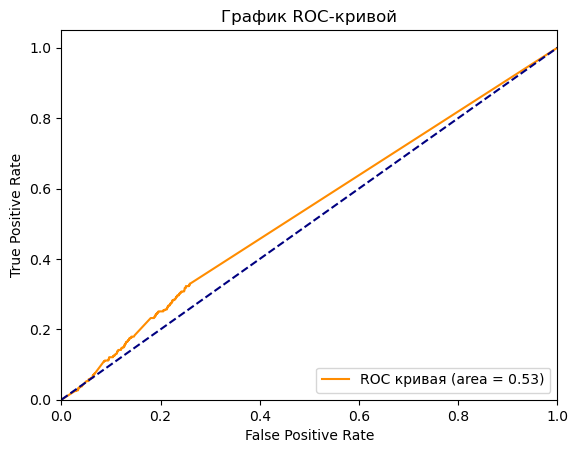

In [72]:
# Построение графика roc-кривой.
fpr, tpr, treshold = roc_curve(y_test, knn.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('График ROC-кривой')
plt.legend(loc="lower right")
plt.show()